In [2]:
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
from libs.utils import *
import matplotlib.pyplot as plt

Instructions for updating:
Use the retry module or similar alternatives.


In [3]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)
x=tf.placeholder(tf.float32, [None, 784])
y=tf.placeholder(tf.float32, [None, 10])
x_tensor=tf.reshape(x,[-1,28,28,1])
filter_size=5
n_filters_1=16
W_conv1=weight_variable([filter_size,filter_size,1,n_filters_1])
b_conv1=bias_variable([n_filters_1])
h_conv1=tf.nn.relu(tf.nn.conv2d(input=x_tensor,filter=W_conv1,strides=[1,2,2,1],padding='SAME')+b_conv1)
n_filters_2=16
W_conv2=weight_variable([filter_size,filter_size,n_filters_1,n_filters_2])
b_conv2=bias_variable([n_filters_2])
h_conv2=tf.nn.relu(tf.nn.conv2d(input=h_conv1,filter=W_conv2,strides=[1,2,2,1],padding='SAME')+b_conv2)






Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
h_conv2_flat=tf.reshape(h_conv2,[-1,7*7*n_filters_2])


In [5]:
n_fc=1024
W_fc1=weight_variable([7*7*n_filters_2,n_fc])
b_fc1=bias_variable([n_fc])
h_fc1=tf.nn.relu(tf.matmul(h_conv2_flat,W_fc1)+b_fc1)



In [6]:
keep_prob=tf.placeholder(tf.float32)
h_fc1_drop=tf.nn.dropout(h_fc1,keep_prob)

In [7]:
w_fc2=weight_variable([n_fc,10])
b_fc2=bias_variable([10])
y_pred=tf.nn.softmax(tf.matmul(h_fc1_drop,w_fc2)+b_fc2)


In [8]:
cross_entropy=-tf.reduce_sum(y*tf.log(y_pred))
optimizer=tf.train.AdamOptimizer().minimize(cross_entropy)


In [9]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y, 1))
accuracy=tf.reduce_mean(tf.cast(correct_prediction,"float"))


In [10]:
sess=tf.Session()
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [12]:
batch_size=100
n_epochs=5
for epoch_i in range(n_epochs):
    for batch_i in range(mnist.train.num_examples//batch_size):
        batch_xs,batch_ys=mnist.train.next_batch(batch_size)
        sess.run(optimizer,feed_dict={x: batch_xs, y:batch_ys, keep_prob: 0.5})
    print(sess.run(accuracy, feed_dict={x: mnist.validation.images, y: mnist.validation.labels, keep_prob: 1.0}))

0.9714
0.9804
0.983
0.9848
0.9856


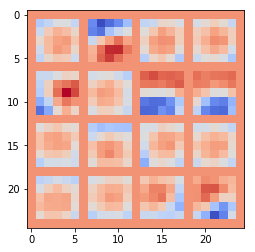

In [13]:
W=sess.run(W_conv1)
plt.imshow(montage(W/np.max(W)),cmap="coolwarm")